# Tutorial: Automated Refinement
Perform a simple automated refinement on a CaNi(PO3)4 sample containing impurity.

In [2]:
from dara.refine import do_refinement_no_saving
from pathlib import Path

In [3]:
data = Path("tutorial_data")
cif_paths = list(data.glob("*.cif"))

pattern_fn = "CaNi(PO3)4_800_240_Ca(OH)2_(NH4)2HPO4_NiO.xy"

## Do refinement
By running `do_refinement_no_saving`, the refinement will be performed and the results will be printed out. There will be no BGMN refinement saved in the disk.

In [5]:
refinement = do_refinement_no_saving(data / pattern_fn, cif_paths)

In [6]:
refinement.visualize()

## Example 2: Phase prediction and automated refinement

In [28]:
from dara.phase_prediction.predict import PhasePredictor
from pathlib import Path

import os

# os.environ["MP_API_KEY"] = **ADD YOUR API KEY**

PATH_TO_ICSD = Path("/Users/mcdermott/Documents/ICSD")  # provide a path to your local copy of the ICSD
predictor = PhasePredictor(
    PATH_TO_ICSD, max_rereact=5
)  # use lower max_rereact to generate less possible phases...

In [29]:
results = predictor.predict(["Bi2O3", "Fe2O3"])

2024-01-17 17:05:58,105 INFO dara.utils Downloading entries from Materials Project...


INFO:dara.utils:Downloading entries from Materials Project...


Retrieving ThermoDoc documents:   0%|          | 0/272 [00:00<?, ?it/s]

Enumerating reactions (BasicEnumerator): 100%|███████| 6/6 [00:00<00:00,  7.29it/s]
Building phase diagrams (MinimizeGibbsEnumerator): 100%|█| 4/4 [00:00<00:00, 737.33
Building chunks...: 100%|██████████████████████████| 4/4 [00:00<00:00, 1057.63it/s]
Enumerating reactions (MinimizeGibbsEnumerator): 100%|█| 1/1 [00:00<00:00, 82.97it/
Enumerating reactions (BasicEnumerator): 100%|███████| 6/6 [00:00<00:00, 19.58it/s]
Building phase diagrams (MinimizeGibbsEnumerator): 100%|█| 4/4 [00:00<00:00, 793.17
Building chunks...: 100%|██████████████████████████| 4/4 [00:00<00:00, 1012.14it/s]
Enumerating reactions (MinimizeGibbsEnumerator): 100%|█| 1/1 [00:00<00:00, 32.10it/
Filtering duplicates: 100%|█████████████████████| 10/10 [00:00<00:00, 11573.69it/s]


In [45]:
test = predictor.predict(["NH6PO4", "Na2CO3", "SnO2"])

2024-01-18 10:03:18,192 INFO dara.utils Downloading entries from Materials Project...


INFO:dara.utils:Downloading entries from Materials Project...


Retrieving ThermoDoc documents:   0%|          | 0/1161 [00:00<?, ?it/s]

Building chunks...: 100%|██████████████████████| 118/118 [00:04<00:00, 29.15it/s]
Enumerating reactions (BasicEnumerator): 100%|█| 3340/3340 [00:02<00:00, 1127.63i
Building phase diagrams (MinimizeGibbsEnumerator): 100%|█| 12/12 [00:00<00:00, 78
Building chunks...: 100%|█████████████████████| 118/118 [00:00<00:00, 771.17it/s]
Enumerating reactions (MinimizeGibbsEnumerator): 100%|█| 20/20 [00:00<00:00, 239.
Filtering duplicates: 0it [00:00, ?it/s]
Building chunks...: 100%|████████████████████████| 57/57 [00:02<00:00, 21.23it/s]
Enumerating reactions (BasicEnumerator): 100%|█| 2310/2310 [00:02<00:00, 838.69it
Building phase diagrams (MinimizeGibbsEnumerator): 100%|█| 12/12 [00:00<00:00, 12
Building chunks...: 100%|███████████████████████| 57/57 [00:00<00:00, 947.81it/s]
Enumerating reactions (MinimizeGibbsEnumerator): 100%|█| 11/11 [00:00<00:00, 333.
Filtering duplicates: 0it [00:00, ?it/s]


In [52]:
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from tqdm import tqdm
from pymatgen.core import Structure

In [76]:
from pymatgen.analysis.diffraction.xrd import WAVELENGTHS

In [77]:
WAVELENGTHS

{'CuKa': 1.54184,
 'CuKa2': 1.54439,
 'CuKa1': 1.54056,
 'CuKb1': 1.39222,
 'MoKa': 0.71073,
 'MoKa2': 0.71359,
 'MoKa1': 0.7093,
 'MoKb1': 0.63229,
 'CrKa': 2.291,
 'CrKa2': 2.29361,
 'CrKa1': 2.2897,
 'CrKb1': 2.08487,
 'FeKa': 1.93735,
 'FeKa2': 1.93998,
 'FeKa1': 1.93604,
 'FeKb1': 1.75661,
 'CoKa': 1.79026,
 'CoKa2': 1.79285,
 'CoKa1': 1.78896,
 'CoKb1': 1.63079,
 'AgKa': 0.560885,
 'AgKa2': 0.563813,
 'AgKa1': 0.559421,
 'AgKb1': 0.497082}

In [67]:
import matplotlib.pyplot as plt
plt.show(plots[1][1])

In [ ]:
for file in "/Users/mcdermott/code/github/dara/notebooks/cifs"

In [ ]:
XRDCalculator().get_plot()

Now we write CIFs for the phases we expect to find in the sample. We will use the CIFs from the [ICSD](https://icsd.products.fiz-karlsruhe.de/) database:

In [46]:
predictor.write_cifs_from_formulas(test)

2024-01-18 10:03:52,803 INFO dara.phase_prediction.predict Skipping common gas: H2


INFO:dara.phase_prediction.predict:Skipping common gas: H2


2024-01-18 10:03:52,804 INFO dara.phase_prediction.predict Skipping common gas: CO2


INFO:dara.phase_prediction.predict:Skipping common gas: CO2


Copied 16564.cif to Na5P3O10_15_(16564)-0.cif in cifs
Copied 25837.cif to Na5P3O10_15_(25837)-0.cif in cifs
2024-01-18 10:03:52,808 INFO dara.phase_prediction.predict Skipping common gas: H2O


INFO:dara.phase_prediction.predict:Skipping common gas: H2O


2024-01-18 10:03:52,808 INFO dara.phase_prediction.predict Skipping common gas: N2


INFO:dara.phase_prediction.predict:Skipping common gas: N2


Copied 10370.cif to Na4P2O7_19_(10370)-0.cif in cifs
Copied 33718.cif to Na3PO4_114_(33718)-5.cif in cifs
Copied 16641.cif to Na3H5(CO4)2_15_(16641)-1.cif in cifs
Copied 192710.cif to Na3H5(CO4)2_15_(192710)-1.cif in cifs
Skipping high-energy phase: 109643 (NaCO2, 15): e_hull = 0.4136
Copied 171458.cif to NaCO2_14_(171458)-7.cif in cifs
2024-01-18 10:03:52,814 WARNING dara.icsd No ICSD codes found for H5C56O!


Copied 966.cif to Sn3(PO4)2_14_(966)-0.cif in cifs
Copied 90682.cif to NaP2H5O8_14_(90682)-0.cif in cifs
Copied 91543.cif to NaP2H5O8_14_(91543)-0.cif in cifs
Copied 15959.cif to Na2H2CO4_29_(15959)-2.cif in cifs
Copied 174021.cif to NaPO3_2_(174021)-0.cif in cifs
Copied 18139.cif to NaPO3_62_(18139)-0.cif in cifs
Copied 15440.cif to NaPO3_14_(15440)-5.cif in cifs
Copied 15871.cif to NaPO3_14_(15871)-5.cif in cifs
Copied 30583.cif to SnP2O7_205_(30583)-40.cif in cifs
Copied 281362.cif to Na2CO3_12_(281362)-0.cif in cifs
Copied 200953.cif to Na2CO3_12_(200953)-0.cif in cifs
Copied 81004.cif to Na2CO3_194_(81004)-17.cif in cifs
Skipping high-energy phase: 157453 (SnO2, 225): e_hull = 0.2457
Copied 183984.cif to SnO2_136_(183984)-0.cif in cifs
Copied 56675.cif to SnO2_58_(56675)-2.cif in cifs
Copied 157450.cif to SnO2_60_(157450)-11.cif in cifs
Copied 62199.cif to SnO2_60_(62199)-11.cif in cifs
Copied 157454.cif to SnO2_62_(157454)-86.cif in cifs
Copied 56677.cif to SnO2_205_(56677)-101.c

INFO:dara.phase_prediction.predict:Reached cost cutoff.


In [44]:
from dara.search.search_phase import search_phases

data = Path("tutorial_data")
cif_paths = list(Path("cifs").glob("*.cif"))

pattern_fn = Path("../tests/test_data/BiFeO3.xy").absolute()
print(pattern_fn)

results = search_phases(
    pattern_path=pattern_fn,
    cif_paths=cif_paths
) # will take 20-30 mins

# return the best combination of phases
best_result = min(results, key=lambda x: results[x].lst_data.rwp)

/Users/mcdermott/code/github/dara/notebooks/../tests/test_data/BiFeO3.xy


Refining single phases:   5%|█                      | 2/42 [00:01<00:25,  1.55it/s]/Users/mcdermott/miniconda3/envs/refinement/lib/python3.11/site-packages/pymatgen/io/cif.py:1221: UserWarning:

Issues encountered while parsing CIF: 2 fractional coordinates rounded to ideal values to avoid issues with finite precision.

Refining single phases:  62%|█████████████▌        | 26/42 [00:27<00:18,  1.18s/it]/Users/mcdermott/miniconda3/envs/refinement/lib/python3.11/site-packages/pymatgen/io/cif.py:1221: UserWarning:

Issues encountered while parsing CIF: 4 fractional coordinates rounded to ideal values to avoid issues with finite precision.

Refining single phases:  86%|██████████████████▊   | 36/42 [00:36<00:05,  1.13it/s]/Users/mcdermott/miniconda3/envs/refinement/lib/python3.11/site-packages/pymatgen/io/cif.py:1221: UserWarning:

Issues encountered while parsing CIF: 2 fractional coordinates rounded to ideal values to avoid issues with finite precision.

Refining single phases: 100%|█████

Rwp = 12.27%: FeBiO3_161_(184771)-0.cif 
Rwp = 11.22%: FeBiO3_161_(184771)-0.cif Fe4Bi2O9_55_(186440)-0.cif 
Rwp = 8.16%: FeBiO3_161_(184771)-0.cif Fe4Bi2O9_55_(186440)-0.cif FeBi25O39_197_(257493)-None.cif 
Rwp = 8.15%: FeBiO3_161_(184771)-0.cif Fe4Bi2O9_55_(186440)-0.cif FeBi25O39_197_(257493)-None.cif FeBiO3_146_(162264)-62.cif 
Rwp = 8.16%: FeBiO3_161_(184771)-0.cif Fe4Bi2O9_55_(186440)-0.cif FeBi25O39_197_(257493)-None.cif Bi2O3_14_(169686)-0.cif 


/Users/mcdermott/miniconda3/envs/refinement/lib/python3.11/site-packages/pymatgen/io/cif.py:1221: UserWarning:

Issues encountered while parsing CIF: 4 fractional coordinates rounded to ideal values to avoid issues with finite precision.



Rwp = 8.15%: FeBiO3_161_(184771)-0.cif Fe4Bi2O9_55_(186440)-0.cif FeBi25O39_197_(257493)-None.cif Bi2O3_164_(186365)-71.cif 
Rwp = 8.16%: FeBiO3_161_(184771)-0.cif Fe4Bi2O9_55_(186440)-0.cif FeBi25O39_197_(257493)-None.cif Fe2O3_166_(291494)-None.cif 
Rwp = 8.16%: FeBiO3_161_(184771)-0.cif Fe4Bi2O9_55_(186440)-0.cif FeBi25O39_197_(257493)-None.cif Fe2O3_19_(671713)-None.cif 
Rwp = 11.19%: FeBiO3_161_(184771)-0.cif Fe4Bi2O9_55_(186440)-0.cif FeBiO3_146_(162264)-62.cif 
Rwp = 8.97%: FeBiO3_161_(184771)-0.cif Fe4Bi2O9_55_(186440)-0.cif Bi2O3_115_(168808)-169.cif 
Rwp = 11.19%: FeBiO3_161_(184771)-0.cif Fe4Bi2O9_55_(186440)-0.cif Bi2O3_115_(168808)-169.cif FeBiO3_146_(162264)-62.cif 
Rwp = 10.31%: FeBiO3_161_(184771)-0.cif Fe4Bi2O9_55_(186440)-0.cif Bi2O3_115_(168808)-169.cif Bi2O3_14_(15752)-0.cif 


KeyboardInterrupt: 

In [41]:
best_refinement = results[best_result]

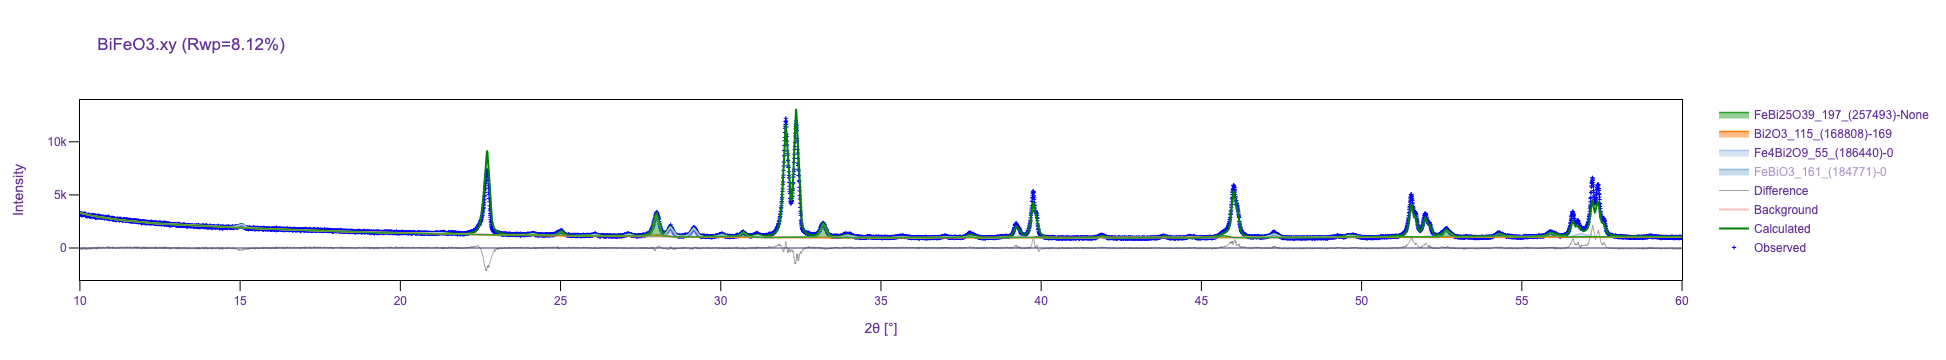

In [42]:
best_refinement.visualize()

In [43]:
best_refinement.get_phase_weights()

{'FeBiO3_161_(184771)-0': 0.7588473912435306,
 'Fe4Bi2O9_55_(186440)-0': 0.13442439502028256,
 'FeBi25O39_197_(257493)-None': 0.08952301021121836,
 'Bi2O3_115_(168808)-169': 0.017205203524968526}